# 4. 다항 시간

위키피디아 발췌

[다항 시간](https://ko.wikipedia.org/wiki/%EB%8B%A4%ED%95%AD_%EC%8B%9C%EA%B0%84)은 어떠한 문제를 계산하는 데에 걸리는 시간 m(n)이 문제의 크기 n의 다항식 함수보다 크지 않은 것을 가리킨다.

대문자 O 표기법을 사용하면 m(n) = O(nk)이 된다. 여기서 k는 문제에 따라 다른 상수 값이다.

일반적으로 입력 길이의 다항 시간이 걸리는 경우를 '빠른', 혹은 '다루기 쉬운'(tractable) 경우라고 표현한다. 반대로 다항 시간보다 오래 걸리는 경우를 초다항 시간(超多項時間)으로 부르며, 이 경우는 '다루기 힘든'(intractable) 경우로 표현한다. 초다항 시간에 속하는 예로는 지수 시간이 있다.

결정론적 튜링 기계로 다항 시간에 풀 수 있는 결정 문제의 복잡도 종류는 P이다. 다항 시간에 답이 맞는지 틀린지를 검사할 수 있는 판정 문제의 복잡도 종류는 NP이다. 다시 말하면, NP는 비결정론적 튜링 기계로 다항 시간에 풀 수 있는 판정 문제의 복잡도 종류이다.

In [7]:
import time
import torch
import random           
import numpy as np
import tensorflow as tf

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
def element_multiplier(my_list):
    for i in range(len(my_list)):
        for j in range(len(my_list)):
            x = my_list[i] * my_list[j]

In [19]:
list_lengths = [10**exponent for exponent in range(1, 9)]
demo_lengths = list_lengths[:4] + [50, 500, 5000, 50000]
demo_lengths.sort()
demo_lengths

[10, 50, 100, 500, 1000, 5000, 10000, 50000]

## 다항 시간 실험 1 - 2중 for문
- 8개의 리스트 길이를 담은 리스트가 있다. 
  - [십, 백, 천, 만, 십만, 백만, 천만, 1억]
- 이 리스트에 담긴 각각의 길이만큼의 정수를 요소로 갖는 리스트를 생성한다.
  - 모든 리스트의 요소는 1과 99 사이의 정수이다. 
- 한 리스트의 n번째 요소에 대해, 첫번째부터 마지막 번째가지의 요소를 곱해준다. 
  - 예) 1번째 요소 x 1번째 요소
  - 예) 1번째 요소 x 2번째 요소 ...
  - 예) 1번째 요소 x 마지막 번째 요소
  - 이 것이 끝나면
  - 예) 2번째 요소 x 1번째 요소 ... 
  - 이런 식으로 끝까지 곱해준다.
- **곱셈의 횟수**
  - 리스트의 길이가 10이면 10x10, 즉 10의 2승번 곱셈을 하게 된다.
  - 리스트의 길이가 10,000이면 만개의 요소에 대해 각 10,000개의 요소를 한 번씩 곱하므로 $10,000^2$번, 즉 1억번의 곱셈을 수행하게 된다. 



### 실험 중지
- 쓸데 없이 오래 걸려서 무의미한 곱셈 연산 중지. 

In [11]:
poly_times = []

for length in list_lengths:
    start = time.process_time()
    random_list = [np.random.randint(1, 100) for random_integer in range(length)]
    end = time.process_time()
    print('{:,}개 길이 리스트 생성 소요 시간: {} 초'.format(length, (end-start)))    
    
    start = time.process_time()
    element_multiplier(random_list)
    end = time.process_time()
    poly_times.append(end - start)
    print('{:,}개 길이 리스트의 2중 for문 곱셈 소요 시간: {} 초\n'.format(length, (end-start)))

10개 길이 리스트 생성 소요 시간: 8.801899999966167e-05 초
10개 길이 리스트의 2중 for문 곱셈 소요 시간: 5.790700000041227e-05 초

100개 길이 리스트 생성 소요 시간: 0.00034771800000044095 초
100개 길이 리스트의 2중 for문 곱셈 소요 시간: 0.0010199320000001677 초

1,000개 길이 리스트 생성 소요 시간: 0.00314759299999956 초
1,000개 길이 리스트의 2중 for문 곱셈 소요 시간: 0.11245990200000122 초

10,000개 길이 리스트 생성 소요 시간: 0.031490632000000573 초
10,000개 길이 리스트의 2중 for문 곱셈 소요 시간: 10.886288853 초

100,000개 길이 리스트 생성 소요 시간: 0.30880744499999935 초


KeyboardInterrupt: ignored

In [14]:
poly_times

[5.790700000041227e-05,
 0.0010199320000001677,
 0.11245990200000122,
 10.886288853]

## 다항 시간 실험 2 - 2중 for문
- 리스트의 길이를 축소해서 재실험

In [20]:
poly_times = []

for length in demo_lengths:
    start = time.process_time()
    random_list = [np.random.randint(1, 100) for random_integer in range(length)]
    end = time.process_time()
    print('{:,}개 길이 리스트 생성 소요 시간: {} 초'.format(length, (end-start)))    
    
    start = time.process_time()
    element_multiplier(random_list)
    end = time.process_time()
    poly_times.append(end - start)
    print('{:,}개 길이 리스트의 2중 for문 곱셈 소요 시간: {} 초\n'.format(length, (end-start)))

10개 길이 리스트 생성 소요 시간: 0.00011972400000104244 초
10개 길이 리스트의 2중 for문 곱셈 소요 시간: 2.544099993428972e-05 초

50개 길이 리스트 생성 소요 시간: 0.00023608500009686395 초
50개 길이 리스트의 2중 for문 곱셈 소요 시간: 0.0002775020000171935 초

100개 길이 리스트 생성 소요 시간: 0.0003738249999969412 초
100개 길이 리스트의 2중 for문 곱셈 소요 시간: 0.001070617999971546 초

500개 길이 리스트 생성 소요 시간: 0.0017149139999901308 초
500개 길이 리스트의 2중 for문 곱셈 소요 시간: 0.02962220899996737 초

1,000개 길이 리스트 생성 소요 시간: 0.003206309000006513 초
1,000개 길이 리스트의 2중 for문 곱셈 소요 시간: 0.10662507899996854 초

5,000개 길이 리스트 생성 소요 시간: 0.01643779000005452 초
5,000개 길이 리스트의 2중 for문 곱셈 소요 시간: 2.7434226730000546 초

10,000개 길이 리스트 생성 소요 시간: 0.03197108299991669 초
10,000개 길이 리스트의 2중 for문 곱셈 소요 시간: 10.892968696999901 초

50,000개 길이 리스트 생성 소요 시간: 0.1574788499999613 초
50,000개 길이 리스트의 2중 for문 곱셈 소요 시간: 276.7752381270001 초



In [21]:
polytime_df = pd.DataFrame(list(zip(demo_lengths, poly_times)), columns=['length', 'time'])
polytime_df

,length,time
0,10,0.000025
1,50,0.000278
2,100,0.001071
3,500,0.029622
4,1000,0.106625
5,5000,2.743423
6,10000,10.892969
7,50000,276.775238


In [25]:
polytime_df.to_csv('/content/polytime.cvs')

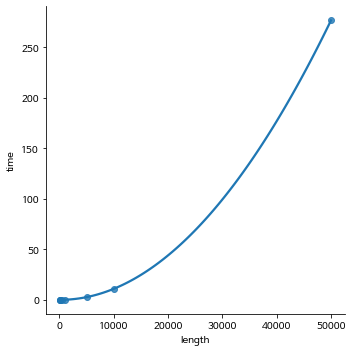

In [24]:
sb.lmplot(x='length', y='time', data=polytime_df, ci=None, order=2)

# 중요 함수
- `sns.lmplot(x='n', y='time', data=dataset, ci=None)`
  - lmplot = linear model (regression) plot
  - ci: confidence intreval, 신뢰구간
- `pd.DataFrame(list(zip(list1, list2, ..., list_n)),`
  - list(zip(item1, item2 ... item_n))
- `time.process_time()`